# Regresja wielomianowa

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats
from patsy import dmatrices

import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Zadanie 1
Wygeneruj $n$ par punktów (x, y) takich, że
$$
y = x - 2x^2 + 0.5x^3 + e,
$$
gdzie $e\sim\mathcal{N}(\mu, \sigma)$. 
A następnie dopasuj model

a) regresji liniowej: $y=\beta_0 + \beta_1\cdot x$

b) regresji wielomianowej stopnia 2: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2$,

c) regresji wielomianowej stopnia 3: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2 + \beta_3\cdot x^3$,

d) regresji wielomianowej stopnia 20: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2 + \ldots + \beta_{20}\cdot x^{20}$,

**Wskazówka**: `smf.ols('y ~ x + I(x**k)', data_frame)` lub `PolynomialFeatures` z `sklearn.preprocessing`

In [2]:
n = 100
x = stats.uniform.rvs(size = n,loc = -3, scale = 6)
eps = stats.norm.rvs(size = n, loc = 2,scale = 2)
y = x-2*(x**2)+0.5*(x**3)+eps

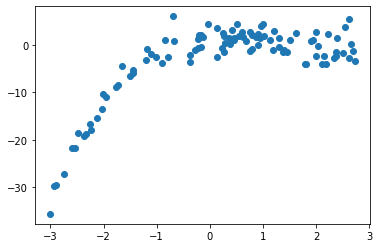

In [4]:
plt.scatter(x,y)
#zależność mocno nieliniowa

In [6]:
#regresja liniowa
X = sm.add_constant(x,prepend = True,has_constant = 'add')
model1 = sm.OLS(endog = y,exog = X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     97.41
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           2.32e-16
Time:                        11:21:14   Log-Likelihood:                -317.92
No. Observations:                 100   AIC:                             639.8
Df Residuals:                      98   BIC:                             645.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0967      0.593     -6.903      0.000      -5.274      -2.919
x1             3.6313      0.368      9.870      0.000       2.901       4.361
==============================================================================
Omnibus:                       13.562   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.603
Skew:                          -0.851   Prob(JB):                     0.000674
Kurtosis:                       3.781   Cond. No.                         1.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

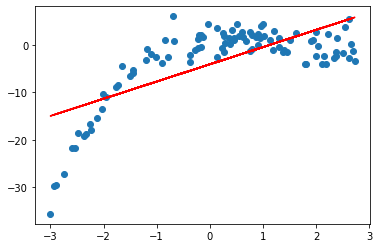

In [7]:
plt.scatter(x,y)
plt.plot(x,x*model1.params[1]+model1.params[0],color = 'red',label = 'degree=1')
#regresja liniowa słabo się dopasowuje

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
#dopasowujemy wielomian stopnia 2
pol2 = PolynomialFeatures(degree = 2)
x.reshape(-1,1)
x2 = pol2.fit_transform(x.reshape(-1,1))
#na danych 1, x, x^2 dopasowujemy model liniowy (regresja wielomianowa) 
model2 = sm.OLS(endog = y,exog = x2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     363.9
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           8.19e-46
Time:                        11:23:00   Log-Likelihood:                -245.40
No. Observations:                 100   AIC:                             496.8
Df Residuals:                      97   BIC:                             504.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1326      0.412      2.749      0.007       0.315       1.950
x1             3.5116      0.179     19.596      0.000       3.156       3.867
x2            -1.9991      0.112    -17.795      0.000      -2.222      -1.776
==============================================================================
Omnibus:                        5.624   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.624
Skew:                           0.368   Prob(JB):                       0.0601
Kurtosis:                       3.899   Cond. No.                         5.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

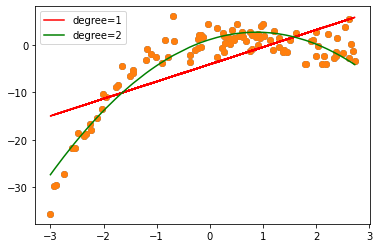

In [11]:
import operator
plt.scatter(x,y)

plt.scatter(x,y)
plt.plot(x,x*model1.params[1]+model1.params[0],color = 'red',label = 'degree=1')

#o wiele lepiej dopasowane, ale na ogonach mogłoby być lepiej
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, model2.fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range,y_poly_pred,color = 'green',label = 'degree=2')
plt.legend()

In [13]:
#alternatywna metoda regresji na 1, x, x^2
df = pd.DataFrame({'y':y,'x':x})
smf.ols('y~x+I(x**2)',df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     363.9
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           8.19e-46
Time:                        11:24:27   Log-Likelihood:                -245.40
No. Observations:                 100   AIC:                             496.8
Df Residuals:                      97   BIC:                             504.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1326      0.412      2.749      0.007       0.315       1.950
x              3.5116      0.179     19.596      0.000       3.156       3.867
I(x ** 2)     -1.9991      0.112    -17.795      0.000      -2.222      -1.776
==============================================================================
Omnibus:                        5.624   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.624
Skew:                           0.368   Prob(JB):                       0.0601
Kurtosis:                       3.899   Cond. No.                         5.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#teraz dla danych 1, x, x^2, x^3
pol3 = PolynomialFeatures(degree = 3)
x.reshape(-1,1)
x3 = pol3.fit_transform(x.reshape(-1,1))
model3 = sm.OLS(endog = y,exog = x3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     469.9
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           3.17e-57
Time:                        11:24:48   Log-Likelihood:                -214.79
No. Observations:                 100   AIC:                             437.6
Df Residuals:                      96   BIC:                             448.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4795      0.307      4.813      0.000       0.869       2.090
x1             0.7530      0.334      2.255      0.026       0.090       1.416
x2            -1.9790      0.083    -23.791      0.000      -2.144      -1.814
x3             0.5348      0.059      9.003      0.000       0.417       0.653
==============================================================================
Omnibus:                        2.765   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.233
Skew:                           0.352   Prob(JB):                        0.327
Kurtosis:                       3.201   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# teraz dla danych 1 ,x ,x^2, x^3,...,x^20
pol20 = PolynomialFeatures(degree = 20)
x.reshape(-1,1)
x20 = pol20.fit_transform(x.reshape(-1,1))
model20 = sm.OLS(endog = y,exog = x20).fit()
model20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     70.23
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           5.63e-42
Time:                        11:25:23   Log-Likelihood:                -205.79
No. Observations:                 100   AIC:                             453.6
Df Residuals:                      79   BIC:                             508.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9367      0.803      1.166      0.247      -0.662       2.536
x1             2.5554      2.796      0.914      0.363      -3.010       8.120
x2            -2.8849     11.222     -0.257      0.798     -25.221      19.451
x3            -8.1284     17.084     -0.476      0.636     -42.133      25.876
x4            11.1328     36.747      0.303      0.763     -62.011      84.277
x5            15.7022     37.489      0.419      0.676     -58.917      90.322
x6           -16.2142     51.737     -0.313      0.755    -119.193      86.765
x7           -13.0408     38.899     -0.335      0.738     -90.467      64.385
x8             9.8836     38.936      0.254      0.800     -67.617      87.384
x9             5.6565     22.211      0.255      0.800     -38.553      49.866
x10           -3.0567     17.356     -0.176      0.861     -37.603      31.490
x11           -1.3800      7.517     -0.184      0.855     -16.341      13.581
x12            0.4878      4.818      0.101      0.920      -9.101      10.077
x13            0.1926      1.546      0.125      0.901      -2.885       3.270
x14           -0.0323      0.844     -0.038      0.970      -1.712       1.647
x15           -0.0147      0.190     -0.078      0.938      -0.392       0.363
x16           -0.0008      0.091     -0.009      0.993      -0.182       0.180
x17            0.0005      0.013      0.041      0.967      -0.025       0.026
x18            0.0002      0.006      0.042      0.967      -0.011       0.011
x19        -5.021e-06      0.000     -0.014      0.989      -0.001       0.001
x20        -8.752e-06      0.000     -0.061      0.952      -0.000       0.000
==============================================================================
Omnibus:                        2.014   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.365   Jarque-Bera (JB):                1.469
Skew:                           0.267   Prob(JB):                        0.480
Kurtosis:                       3.259   Cond. No.                     1.88e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

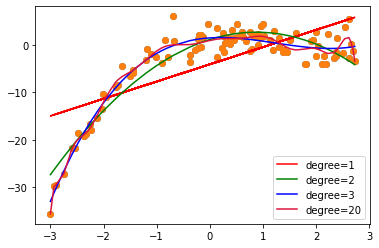

In [17]:
plt.scatter(x,y)

plt.scatter(x,y)
plt.plot(x,x*model1.params[1]+model1.params[0],color = 'red',label = 'degree=1')

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, model2.fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range,y_poly_pred,color = 'green',label = 'degree=2')


sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, model3.fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range,y_poly_pred,color = 'blue',label = 'degree=3')


sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, model20.fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range,y_poly_pred,color = 'crimson',label = 'degree=20')
plt.legend()
#model 1,x,x^2,x^3 bardzo ładnie się dopasował
#model 1,x,x^2...,x^20 dopasował się aż za dobrze, mamy przeuczenie

### The Bias vs Variance trade-off

**Bias** (obciążenie) - odnosi się do błędu wynikającego z uproszczonych założeń modelu dotyczących dopasowania danych. Wysokie obciążenie oznacza, że model nie jest w stanie uchwycić wzorców w danych, co powoduje niedopasowanie/niedouczenie (ang. *under-fitting*).

**Variance** - odnosi się do błędu spowodowanego złożonym modelem próbującym dopasować dane. Duża wariancja oznacza, że model przechodzi przez większość punktów danych i powoduje nadmierne dopasowanie do danych (ang. *over-fitting).

Text(0.5, 0, 'Overfit\nLow bias\nHigh Variance')

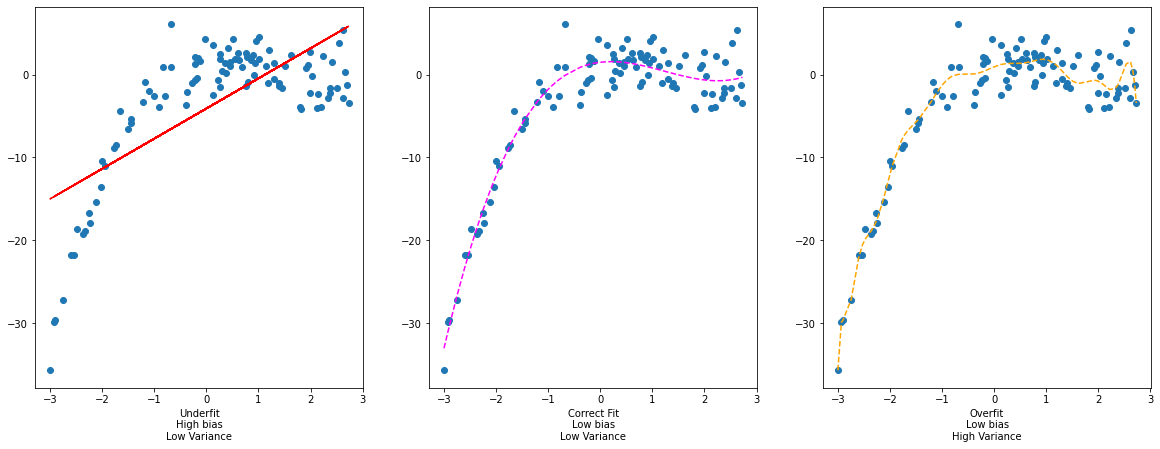

In [19]:
# liniowa underfit
# 1,x,x^2,x^3 bardzo dobre dopasowanie
# 1,x,x^2,...,x^20 overfit
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

ax[0].scatter(x, y)
ax[0].plot(x, model1.fittedvalues, '--', color='red', label="degree=1")
ax[0].set_xlabel("Underfit\nHigh bias\nLow Variance")

sorted_zip = sorted(zip(x, model3.fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
ax[1].scatter(x, y)
ax[1].plot(x_range, y_poly_pred, '--', color='magenta', label="degree=3")
ax[1].set_xlabel("Correct Fit\nLow bias\nLow Variance")

sorted_zip = sorted(zip(x, model20.fittedvalues), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
ax[2].scatter(x, y)
ax[2].plot(x_range, y_poly_pred, '--', color='orange', label="degree=20")
ax[2].set_xlabel("Overfit\nLow bias\nHigh Variance")

# Zadanie 2
Wczytaj dane `amazon_salaries.csv` opisujące wysokość rocznych zarobków (`Salary`) w zależności od zajmowanego stanowiska (`Level`). 

Dopasuj model regresji liniowej oraz model regresji wielomianowej, znajdź najlepszy stopień wielomianu.

In [20]:
amazon_salary = pd.read_csv("amazon_salaries.csv")

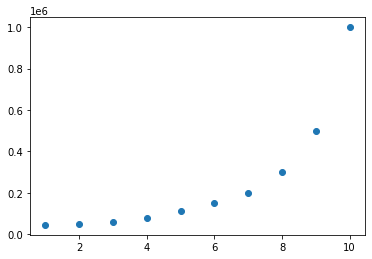

In [21]:
x = amazon_salary.Level
y = amazon_salary.Salary

plt.scatter(x, y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


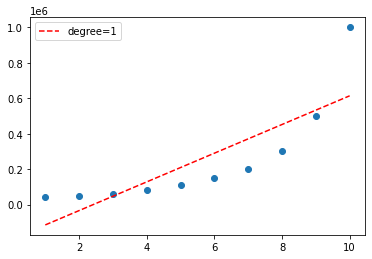

Degree=1, R2=0.6690412331929894


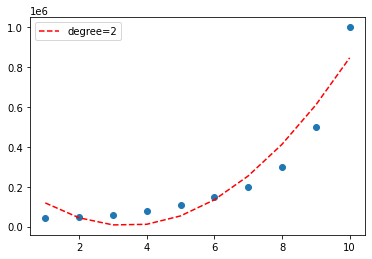

Degree=2, R2=0.9162082221443943


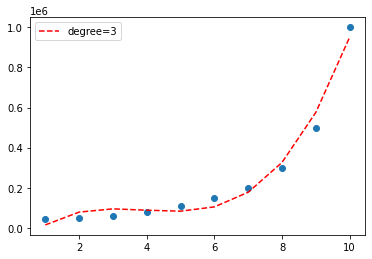

Degree=3, R2=0.9812097727913367


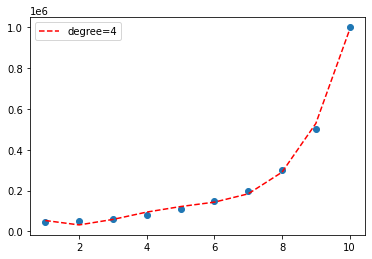

Degree=4, R2=0.9973922891706613


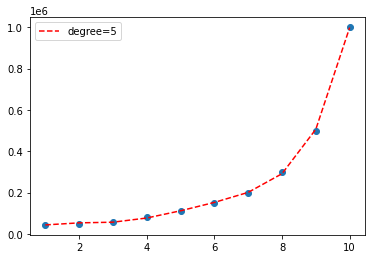

Degree=5, R2=0.9997969027099755


In [22]:
X = sm.add_constant(x, prepend=True, has_constant='skip')
model1 = sm.OLS(endog=y, exog=X).fit()

plt.scatter(x, y)
plt.plot(x, model1.fittedvalues, '--', color='red', label="degree=1")
plt.legend()
plt.show()
print("Degree=1, R2={}".format(model1.rsquared))

for i in np.arange(2, 6):
    polynomial_features = PolynomialFeatures(degree=i)
    xi = polynomial_features.fit_transform(np.array(x).reshape(-1,1))

    model= sm.OLS(endog=y, exog=xi).fit()
    
    plt.scatter(x, y)
    plt.plot(x, model.fittedvalues, '--', color='red', label="degree={}".format(i))
    plt.legend()
    plt.show()
    print("Degree={}, R2={}".format(i, model.rsquared))
    #im większy stopień wielomianu tym lepsze dopasowanie

In [ ]:
#cięzko jednoznacznie stwierdzić, który stopień wielomianu wziąć, może 4, może 5 stopnia
# przydałby sie zbiór testowy (inne stanowiska z zarobkami)